In [1]:
from Fit import *
from QuasinormalMode import *
from Waveforms import *
from ModeSelection import *
import jax.numpy as jnp
import matplotlib.pyplot as plt

2023-03-08 14:40:07.926485: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-03-08 14:40:07.969965: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-03-08 14:40:07.972460: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [2]:
import random

In [3]:
ROOT_PATH = globals()['_dh'][0]
PLOT_PATH_ROOT = os.path.join(ROOT_PATH, f"plots/")

In [4]:
i = 0
ii = i
batch_runname = "eff2"
param_dict = read_json_for_param_dict(i, batch_runname)

In [5]:
Mf = param_dict['Mf']
af = param_dict['af']
omega220, omega320, omega221, omegaconstant = long_str_to_qnms("2.2.0_3.2.0_2.2.1_constant", Mf, af)
A220, phi220 = param_dict['inj_dict']["2.2.0"]
A320, phi320 = param_dict['inj_dict']["3.2.0"]
A221, phi221 = param_dict['inj_dict']["2.2.1"]
Aconstant, phiconstant = param_dict['inj_dict']["constant"]

2023-03-08 14:40:21.418171: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-03-08 14:40:21.418209: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
guess_list = [A220, phi220, float(omega220.omegar), float(omega220.omegai),
              A320, phi320, float(omega320.omegar), float(omega320.omegai),
              A221, phi221, float(omega221.omegar), float(omega221.omegai),
              Aconstant, phiconstant, float(omegaconstant.omegar), float(omegaconstant.omegai),]

In [7]:
h_eff = make_eff_ringdown_waveform_from_param(param_dict)

In [8]:
N_free = 10
guess_num = 100
A_guesses = 10**(np.random.uniform(-4, 2, size = (guess_num, N_free)))
phi_guesses = np.random.uniform(0, 2*np.pi, size = (guess_num, N_free))
omegar_guesses = np.random.uniform(-2, 2, size = (guess_num, N_free))
omegai_guesses = np.random.uniform(0, -1, size = (guess_num, N_free))

In [9]:
guesses_stack = np.empty((guess_num, 4 * N_free), dtype = A_guesses.dtype)
guesses_stack[:,0::4] = A_guesses 
guesses_stack[:,1::4] = phi_guesses 
guesses_stack[:,2::4] = omegar_guesses
guesses_stack[:,3::4] = omegai_guesses

In [10]:
guess_list = [list(guess) for guess in guesses_stack]

In [13]:
N_free = 10
guess_num = 10
t0_arr = np.linspace(0, 0.1, num = 1)
qnm_fixed_list = []
N_fix = len(qnm_fixed_list)
time_longest, _, _ = h_eff.postmerger(t0_arr[0])
jcf = CurveFit(flength=2 * len(time_longest))
fit_results = []
fit_kwargs = {} #{'ftol': 1e-15, 'xtol': 1e-15, 'gtol': 1e-15}
for i in range(guess_num):
    params0 = jnp.array([1, 1] * N_fix + guess_list[i])
    fitter = QNMFitVaryingStartingTime(h_eff, t0_arr, N_free = N_free,
                                    qnm_fixed_list = qnm_fixed_list, jcf = jcf, load_pickle = True,
                                    params0 = params0, 
                                    # run_string_prefix = f"conv_test_g_{g:.4f}",
                                    run_string_prefix = f"0305_lm_22_convergence_test1_{i}",
                                    fit_kwargs = fit_kwargs)
    fitter.do_fits()
    fit_results.append(fitter.result_full)
    jcf = fitter.jcf


reloaded fit 0305_lm_22_convergence_test1_0_N_10_t0_0.0000_0.0000_1 from an old run.
reloaded fit 0305_lm_22_convergence_test1_1_N_10_t0_0.0000_0.0000_1 from an old run.
reloaded fit 0305_lm_22_convergence_test1_2_N_10_t0_0.0000_0.0000_1 from an old run.
reloaded fit 0305_lm_22_convergence_test1_3_N_10_t0_0.0000_0.0000_1 from an old run.
reloaded fit 0305_lm_22_convergence_test1_4_N_10_t0_0.0000_0.0000_1 from an old run.
reloaded fit 0305_lm_22_convergence_test1_5_N_10_t0_0.0000_0.0000_1 from an old run.
reloaded fit 0305_lm_22_convergence_test1_6_N_10_t0_0.0000_0.0000_1 from an old run.
reloaded fit 0305_lm_22_convergence_test1_7_N_10_t0_0.0000_0.0000_1 from an old run.
reloaded fit 0305_lm_22_convergence_test1_8_N_10_t0_0.0000_0.0000_1 from an old run.
reloaded fit 0305_lm_22_convergence_test1_9_N_10_t0_0.0000_0.0000_1 from an old run.


In [14]:
mismatch_all = []
for j, result_full in enumerate(fit_results):
    mismatch = result_full.mismatch_arr
    mismatch_all.append(mismatch[0])
mismatch_all = np.array(mismatch_all)

In [5]:
from functools import partial 

def test_func(a, b, c, d, e =5):
    return a + b + 2*c + d + e

partial_func = partial(test_func, b = 3, c = 2, d = 4, e = 5)
partial_func(1)

17

(array([6., 0., 0., 0., 0., 0., 0., 0., 0., 4.]),
 array([1.76957449e-10, 1.40121459e-09, 2.62547173e-09, 3.84972887e-09,
        5.07398601e-09, 6.29824315e-09, 7.52250029e-09, 8.74675743e-09,
        9.97101457e-09, 1.11952717e-08, 1.24195288e-08]),
 <BarContainer object of 10 artists>)

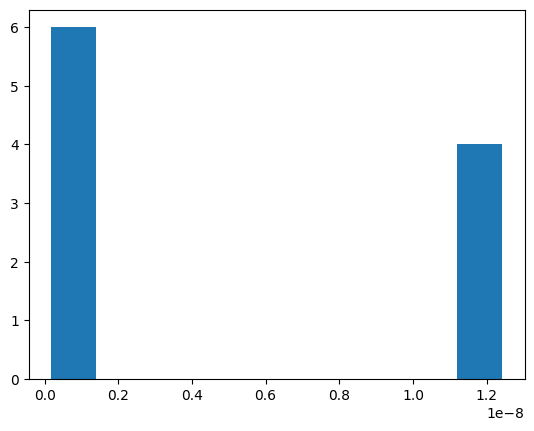

In [16]:
plt.hist(mismatch_all)

In [40]:
(1-45/100)**10

0.0025329516211914085

In [26]:
len(mismatch_all[mismatch_all < 1.001*np.amin(mismatch_all)])

58

(0.0, -0.4)

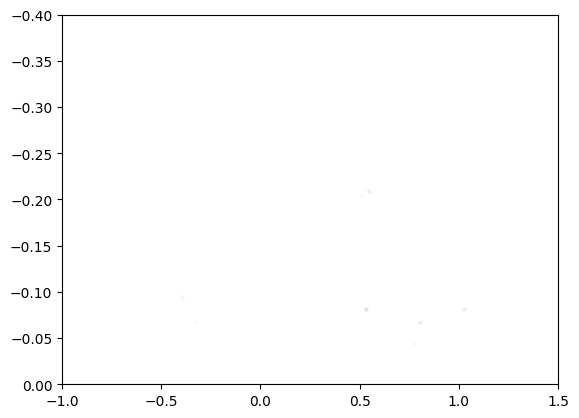

In [34]:
for j, result_full in enumerate(fit_results):
    omega_dict = result_full.omega_dict
    for i in range(N_free):
        plt.scatter(omega_dict['real'][f'omega_r_free_{i}'], 
                    omega_dict['imag'][f'omega_i_free_{i}'], 
                    s = 5, c = f'C{j}', alpha = 0.01)
plt.xlim(-1, 1.5)
plt.ylim(0., -0.4)

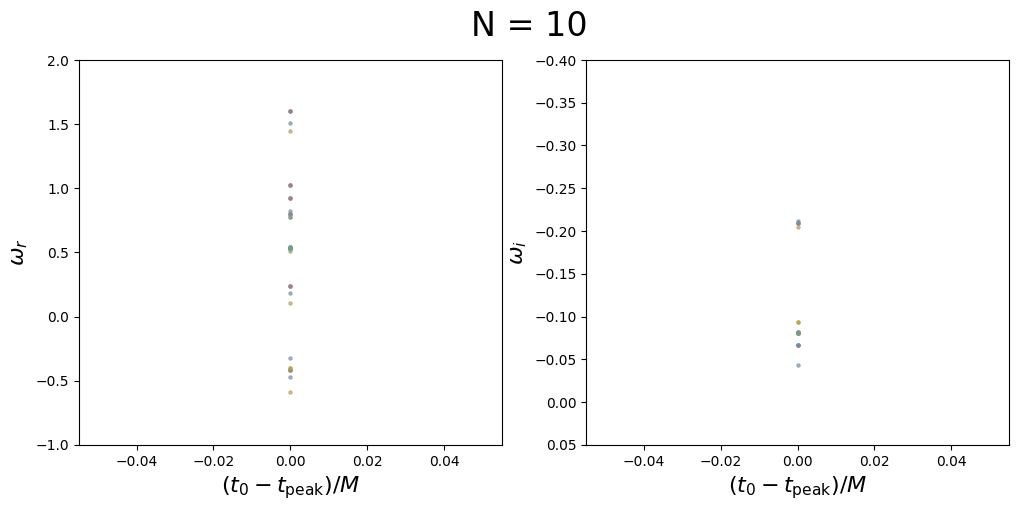

In [35]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))

for j, result_full in enumerate(fit_results):
    omega_dict = result_full.omega_dict
    for i in range(N_free):
        axs[0].scatter(t0_arr,
                    omega_dict['real'][f'omega_r_free_{i}'], 
                    s = 5, c = f'C{j}', alpha = 0.3)
        axs[1].scatter(t0_arr, 
                    omega_dict['imag'][f'omega_i_free_{i}'], 
                    s = 5, c = f'C{j}', alpha = 0.3)
axs[0].set_ylim(-1, 2)
axs[1].set_ylim(0.05, -0.4)
axs[0].set_xlabel(r"$(t_0 - t_{\rm peak})/M$", fontsize = 16)
axs[1].set_xlabel(r"$(t_0 - t_{\rm peak})/M$", fontsize = 16)
axs[0].set_ylabel(r"$\omega_r$", fontsize = 16)
axs[1].set_ylabel(r"$\omega_i$", fontsize = 16)
fig.suptitle(f"N = {N_free}", fontsize = 24)

plt.savefig(PLOT_PATH_ROOT + f"convergence_{batch_runname}_{ii:03d}_N_{N_free}.pdf", bbox_inches = "tight")
plt.savefig(PLOT_PATH_ROOT + f"convergence_{batch_runname}_{ii:03d}_N_{N_free}.png", dpi = 150, bbox_inches = "tight",
            facecolor='white', transparent=False)